In [7]:
import requests
from bs4 import BeautifulSoup
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [19]:
#Webscraping. Used beautiful soup and requests as Fakun proved tricky for me
url = "https://depositphotos.com/photos/nicolas-cage.html"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
images = soup.find_all('img')
image_dir = "scraped_images"
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
    
for i, image in enumerate(images):
    image_url = image.get('src')
    if image_url:
        response = requests.get(image_url)
        with open(os.path.join(image_dir, f"image_{i}.jpg"), 'wb') as file:
            file.write(response.content)

In [11]:
print(os.getcwd())

/home/lab_services_student


In [22]:
#data preprocessing
image_size = (224, 224)
images = []
labels = []
for file in os.listdir(image_dir):
    image = Image.open(os.path.join(image_dir, file))
    image = image.resize(image_size)
    images.append(np.array(image))
    labels.append(0)  # Assign label (e.g., 0 for one class)

images = np.array(images)
labels = np.array(labels)
images = images / 255.0
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [23]:
# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [25]:
# Train Model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7196 - accuracy: 0.0000e+00 - val_loss: 8.1638e-04 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 211ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3597e-06 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 207ms/step - loss: 3.5609e-06 - accuracy: 1.0000 - val_loss: 1.6570e-09 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 217ms/step - loss: 8.9203e-09 - accuracy: 1.0000 - val_loss: 1.4705e-12 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 211ms/step - loss: 1.7846e-11 - accuracy: 1.0000 - val_loss: 1.0780e-15 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 209ms/step - loss: 3.1339e-14 - accuracy: 1.0000 - val_loss: 7.5625e-19 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 206ms/step - loss: 5.4609e-17 - accuracy: 1.0000 - val_loss: 5.629

In [26]:
# Evaluate Model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy:.2f}%")

1/1 [==============================] - 0s 38ms/step - loss: 7.0707e-31 - accuracy: 1.0000
Test accuracy: 1.00%


In [27]:
# Use Model for Image Recognition
def recognize_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = np.array(image) / 255.0
    prediction = model.predict(np.expand_dims(image, axis=0))
    return prediction

In [40]:
import matplotlib.image as mpimg

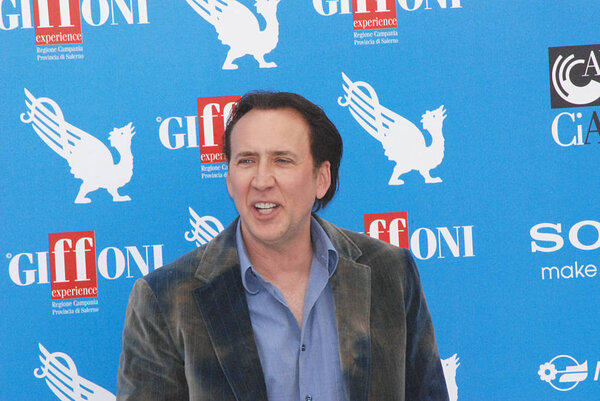

In [43]:
# Example usage
image_path = "scraped_images/image_19.jpg"
#prediction = recognize_image(image_path)
#print(f"Prediction: {prediction[0][0]:.2f}")
#image = mpimg.imread(image_path)
image = Image.open(image_path)
image.show()
# Display the image
#plt.imshow(image)
#plt.show()
